# PYROCB brightness temperature
- using the data from laura that I downloaded with the brightness temperature script 
- download data in terminal 
- to get different days, have to change the script 

## downloads

In [1]:
import os
import awscli as aws
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date 
from datetime import time

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely import geometry

import matplotlib.pyplot as plt
import xarray 
import scipy.stats as ss 
import metpy  
import os
import h5py    
from pyhdf import SD
from mpl_toolkits.basemap import Basemap
import colormap
import time
import calendar
from matplotlib.patches import Polygon
from netCDF4 import Dataset # Import the NetCDF Python interface


## import files 
OR_ABI-L2-MCMIPC-M3_G16_s20181781922189_e20181781924562_c20181781925075.nc

OR - Indicates the system is operational

ABI - Instrument type

L2 - Level 2 Data

MCMIP - Multichannel Cloud and Moisture Imagery products

c - CONUS file (created every 5 minutes).

M3 - Scan mode

G16 - GOES-16

sYYYYJJJHHMMSSZ - Scan start: 4 digit year, 3 digit day of year (Julian day), hour, minute, second, tenth second

eYYYYJJJHHMMSSZ - Scan end

cYYYYJJJHHMMSSZ - File Creation .nc - NetCDF file extension

## test a file

In [2]:
# data/edworak/202118205/OR_ABI-L2-MCMIPF-M6_G17_s20211820520320_e20211820529392_c20211820529542.nc
path = '/data/edworak/BT/202118120'
list_names = os.listdir(path)
print(list_names) 

['OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812030321_e20211812039399_c20211812039542.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812000321_e20211812009394_c20211812009542.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812040321_e20211812049394_c20211812049540.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812010321_e20211812019388_c20211812019541.nc', 'OR_ABI-L2-MCMIPF-M6_G17_s20211812050321_e20211812059399_c20211812059540.nc']


In [3]:
FILE = '/data/edworak/BT/202118120/OR_ABI-L2-MCMIPF-M6_G17_s20211812020321_e20211812029394_c20211812029541.nc'
# FILE = path + file_names[i]
data = xarray.open_dataset(FILE)
goes_data = data['CMI_C07'][:]
goes_data

<xarray.DataArray 'CMI_C07' (y: 5424, x: 5424)>
[29419776 values with dtype=float32]
Coordinates:
    t        datetime64[ns] ...
  * y        (y) float32 0.1518 0.1518 0.1517 0.1517 ... -0.1517 -0.1518 -0.1518
  * x        (x) float32 -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  14
    valid_range:            [    0 16383]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C07

## file name list 

In [4]:
# create empty array to add into 
folder_names_unsorted = []
path = '/data/edworak/BT'
folder = os.listdir(path)
#print(file)

for f in folder[1:]: 
    folder_names_unsorted.append(f)
folder_names = sorted(folder_names_unsorted)
folder_names

['202118120',
 '202118121',
 '202118122',
 '202118123',
 '202118200',
 '202118201',
 '202118202',
 '202118203',
 '202118204',
 '202118205',
 '202118206']

In [5]:
file_names_unsorted = []
for i in range(0, len(folder_names)): 
    path = '/data/edworak/BT/' + folder_names[i]
    #print(path)
    file = os.listdir(path)
    file_names_unsorted.append(file)
file_names = sorted(file_names_unsorted)
# file_names = [item for sublist in file_names_unsorted for item in sublist]
file_names[1][1]

'OR_ABI-L2-MCMIPF-M6_G17_s20211812120319_e20211812129391_c20211812129541.nc'

In [6]:
# download files 
goes_data = []

for i in range(0, len(folder_names), 1):
    for j in range(0, 6, 1):
        #print("i:{}".format(i))
        #print("j:{}".format(j))
        path = '/data/edworak/BT/' + folder_names[i] + '/'
        FILE = path + file_names[i][j]
       # print(FILE)
        #"goes_"+ filename[i][30:36] = xarray.open_dataset(FILE)
        goes_data = xarray.open_dataset(FILE)
goes_data

<xarray.Dataset>
Dimensions:                                 (y: 5424, x: 5424,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2, band: 1)
Coordinates: (12/37)
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1518 ... -0.1518
  * x                                       (x) float32 -0.1518 ... 0.1518
    y_image                                 float32 ...
    x_image                                 float32 ...
    band_wavelength_C01                     (band) float32 ...
    ...                                      ...
    band_id_C11                             (band) int8 ...
    band_id_C12                             (band) int8 ...
    band_id_C13                             (band) int8 ...
    band_id_C14                             (band) int8 ...
    band_id_C15                             (band) int8 ...
    band_id_C16                             (band) int8 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                band
Data variables: (12/124)
    CMI_C01                                 (y, x) float32 ...
    DQF_C01                                 (y, x) float32 ...
    CMI_C02                                 (y, x) float32 ...
    DQF_C02                                 (y, x) float32 ...
    CMI_C03                                 (y, x) float32 ...
    DQF_C03                                 (y, x) float32 ...
    ...                                      ...
    mean_brightness_temperature_C16         float32 ...
    std_dev_brightness_temperature_C16      float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    dynamic_algorithm_input_data_container  int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    date_created:              2021-07-01T06:59:54.2Z
    time_coverage_start:       2021-07-01T06:50:32.0Z
    time_coverage_end:         2021-07-01T06:59:39.8Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        b4feff2b-9c1b-45e1-bd1a-acd31b58031f

In [7]:
print(goes_data['CMI_C14'][:])


<xarray.DataArray 'CMI_C14' (y: 5424, x: 5424)>
[29419776 values with dtype=float32]
Coordinates:
    t        datetime64[ns] 2021-07-01T06:55:05.917972992
  * y        (y) float32 0.1518 0.1518 0.1517 0.1517 ... -0.1517 -0.1518 -0.1518
  * x        (x) float32 -0.1518 -0.1518 -0.1517 ... 0.1517 0.1518 0.1518
    y_image  float32 0.0
    x_image  float32 0.0
Attributes:
    long_name:              ABI Cloud and Moisture Imagery brightness tempera...
    standard_name:          toa_brightness_temperature
    sensor_band_bit_depth:  12
    valid_range:            [   0 4095]
    units:                  K
    resolution:             y: 0.000056 rad x: 0.000056 rad
    grid_mapping:           goes_imager_projection
    cell_methods:           t: point area: point
    ancillary_variables:    DQF_C14


## make a map 

/tmp/ipykernel_153280/3695878732.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


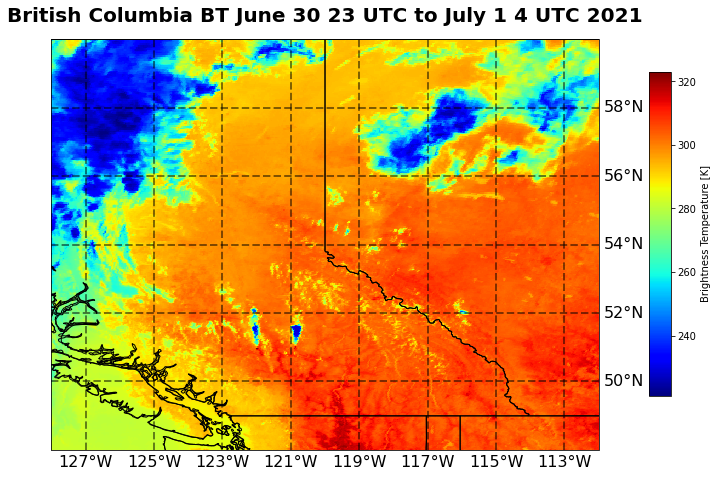

In [13]:
fig = plt.figure(figsize=(10, 6))

FILE = '/data/edworak/BT/202118120/OR_ABI-L2-MCMIPF-M6_G17_s20211812030321_e20211812039399_c20211812039542.nc'
data = xarray.open_dataset(FILE)
goes_string = str(data)
goes_data = data['CMI_C14'][:]

dat = data.metpy.parse_cf('CMI_C14')
geos = dat.metpy.cartopy_crs    
x = dat.x
y = dat.y
# ------------------------------------------------------------------------------------------------------

pc = ccrs.PlateCarree()

#ax = plt.axes(projection=ccrs.PlateCarree())
ax = fig.add_subplot(1, 1, 1, projection=pc)
ax.set_extent([-128, -112, 48, 60], crs=pc)

# scan_start = datetime.strptime(goes_data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
# plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M')), fontsize = 20) #loc='right'

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linewidth=2, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-127, -125, -123, -121, -119, -117, -115, -113])
gl.ylocator = mticker.FixedLocator([50,  52, 54, 56, 58])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'


#ax.imshow(goes_data, origin='upper', extent=(x.min(), x.max(), y.min(), y.max()), transform=geos, interpolation='none')
# transform = geos i have to convert the map to other coordinates because it will show up on earth map but not flat map 

im = ax.imshow(goes_data, origin='upper', extent=(x.min(), x.max(), y.min(), y.max()), transform = geos, interpolation='none', cmap='jet') #, ax = axcax = plt.axes([0.8, 0.15, 0.03, 0.75])

ax.coastlines(resolution='50m', color='black', linewidth=1.0)
ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=1.0)

# [left, bottom, width, height]
cax = plt.axes([0.95, 0.15, 0.03, 0.75])
plt.colorbar(im, label='Brightness Temperature [K]', cax = cax)
# plt.clim(193, 303)
plt.tight_layout()

plt.suptitle('British Columbia BT June 30 23 UTC to July 1 4 UTC 2021', fontweight='bold', fontsize=20, y = 1.05)
# plt.savefig("goes_fire_detect".format(scan_start.strftime('%d %B %Y %H:%M UTC ')), bbox_inches = "tight", dpi = 900)
plt.show()
